# 1. Setup 

## 1.1 Importing Libraries

In [147]:
# importing requried libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## 1.2 Loading Datasets

In [148]:
# loading train data

train_data = pd.read_csv("/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv")

In [149]:
# checking train data

train_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


- Crop recommendation dataset contains the above entities.

In [150]:
# train data size

train_data.shape

(2200, 8)

- Dataset will contain 2200 rows with 8 coloumns.

## 1.3 Splitting Dataset

In [151]:
# splitting train data in to train and test for model training

# features contain all training parameters

features = train_data.drop("label",axis=1)
features.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [152]:
# labels here contain crop coloumn

labels = train_data["label"]
features.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [153]:
# creating train and and test

# test data contains 20 % of all data
train_X, test_X, train_Y, test_Y = train_test_split(
    features, labels,
    test_size=0.2,
    random_state=12140860,
    stratify=labels
)

In [154]:
# train and test data size

# train_data
print("Printing train_X data size :- ",train_X.shape)
print("Printing train_Y data size :- ",train_Y.shape)

Printing train_X data size :-  (1760, 7)
Printing train_Y data size :-  (1760,)


In [155]:
# train_data
print("Printing test_X data size :- ",test_X.shape)
print("Printing test_Y data size :- ",test_Y.shape)

Printing test_X data size :-  (440, 7)
Printing test_Y data size :-  (440,)


# 2. Data Analyzing and Pre-processing


## 2.1 Analyzing datasets

In [156]:
# train data

train_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [157]:
# train_data all columns labels

train_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

**This dataset contain information related to crop and different factors affecting for each crop. Each row in the dataset represents the characteristics and environmental factors associated with the cultivation of a specific crop. Columns are as follows:**


1. 'N': This column represent the level of Nitrogen in the soil, an essential nutrient for plant growth.
2. 'P': It signify the Phosphorus content in the soil, another vital nutrient.
3. 'K': This represent the Potassium content in the soil, which is essential for plant health.
4. 'temperature': This column indicates the temperature conditions during the crop cultivation.
5. 'humidity': It probably represents the humidity levels during the crop growth.
6. 'ph': This stand for the pH value of the soil, indicating its acidity or alkalinity.
7. 'rainfall': It represent the amount of rainfall received during the crop cultivation.
8. 'label': This column specify the type of crop being cultivated for each row of data.

Overall, this dataset is a collection of features and conditions relevant to different crops, and it could be used to develop predictive models for crop yield or type classification based on these attributes.


In [158]:
# crop list 

crops_list = train_data['label'].unique()
crops_list 

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [159]:
# total crops 

crops_list.size

22

**The crop recommendation dataset contains 22 different types of crops:**

- rice
- maize
- chickpea
- kidneybeans
- pigeonpeas
- mothbeans
- mungbean
- blackgram
- lentil
- pomegranate
- banana
- mango
- grapes
- watermelon
- muskmelon
- apple
- orange
- papaya
- coconut
- cotton
- jute
- coffee

In [160]:
# Cropwise count

label_counts = train_data['label'].value_counts()
print(label_counts)

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [161]:
# train_data information

train_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [162]:
# Correlation matrix

train_data.drop('label',axis=1).corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Here we can see that Phosphorus and Potassium are strongly corelated

<Axes: >

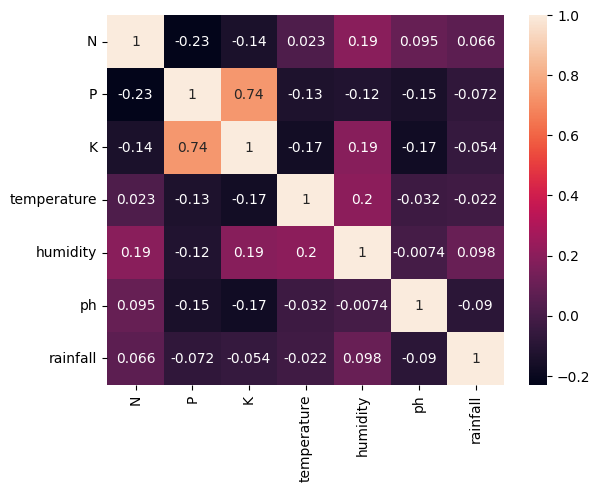

In [163]:
# Analyzing correlation

sns.heatmap(train_X.corr(),annot=True)

## 2.2 Data Preprocessing

In [164]:
# checking data types of variable

train_data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

- Based on the data types of the columns in `train_data` dataset, it appears that most of the columns are already in numeric format (integers or floating-point numbers), except for the 'label' column, which is of type 'object.' The 'label' column contains the target or class labels.

- In this case, data preprocessing is needed primarily for encoding the categorical 'label' column into a numerical format so that it can be used for training our models.Here we can use techniques like label encoding or one-hot encoding to convert the 'label' column into a numeric format.

- **One-Hot Encoding ('label' has nominal categories):** ` The 'label' column contains nominal categories (categories with no specific order), we can use one-hot encoding to create binary columns for each category. Each binary column represents the presence or absence of a category. We are using this method because there is no ordinal relationship between categories.`

- **Label Encoding (if 'label' has ordinal categories):** If the 'label' column contains ordinal categories (categories with a specific order), We can use this method for analyzing corelation also.


In [165]:
# Use get_dummies for one-hot encoding

train_data_encoded = pd.get_dummies(train_data, columns=['label'], prefix=['label'])

In [166]:
train_data_encoded.head()

,N,P,K,temperature,humidity,ph,rainfall,label_apple,label_banana,label_blackgram,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,90,42,43,20.879744,82.002744,6.502985,202.935536,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,85,58,41,21.770462,80.319644,7.038096,226.655537,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,60,55,44,23.004459,82.320763,7.840207,263.964248,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,74,35,40,26.491096,80.158363,6.980401,242.864034,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,78,42,42,20.130175,81.604873,7.628473,262.717340,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [167]:
# removing Nan values

train_data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

The output indicates that there are no missing (NaN) values in the dataset. This is a good sign because missing data can be problematic when training our models. Since all columns have 0 missing values, we don't need to perform any missing data imputation or preprocessing related to handling missing values for this dataset.

# 3. Data Visualization

In [168]:
# importing libraries

import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as pex

import warnings
warnings.filterwarnings('ignore')

**Methods Defination**

In [169]:
def generate_bar_chart(data, column_name):
     # Calculate the mean for each crop label based on the specified column
    mean = pd.pivot_table(data,index=['label'],aggfunc='mean')
    
     # Sort the summary by the specified column in descending order
    summary = mean.sort_values(by=column_name, ascending=False)

    fig = make_subplots(rows=1, cols=2)
    
    # Define the data for the top 8 crops with the highest values in the specified column
    top = {
        'y': summary[column_name][0:8].sort_values().index,
        'x': summary[column_name][0:8].sort_values()
    }

    # Define the data for the last 10 crops with the lowest values in the specified column
    last = {
        'y': summary[column_name][-8:].sort_values().index,
        'x': summary[column_name][-8:].sort_values()
    }

    # Generate a list of random colors for the bars
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(20)]
    
    # Add a bar chart for the top crops
    fig.add_trace(
        go.Bar(
            top,
            marker_color=random.choice(color),
            name=f'Most {column_name} Required',
            orientation='h',
            text=top['x']
        ),
        row=1, col=1
    )

     # Add a bar chart for the last crops
    fig.add_trace(
        go.Bar(
            last,
            marker_color=random.choice(color),
            name=f'Least {column_name} Required',
            orientation='h',
            text=last['x']
        ),
        row=1, col=2
    )

    # Update the chart properties
    fig.update_traces(texttemplate='%{text}', textposition='inside')
    fig.update_layout(title=column_name, font_size=12)
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    
    # Display the chart
    fig.show()

In [170]:
def make_scatter(feature_1,feature_2):
    fig = pex.scatter( train_data,
                       x = feature_1,
                       y = feature_2,
                      color = train_data['label']
                     )
    
    fig.show()

In [171]:
# generating bar chart to check 'P' values 

generate_bar_chart(train_data,'P')

In [172]:
# generating bar chart to check 'N' values 

generate_bar_chart(train_data,'N')

In [173]:
# generating bar chart to check 'K' values 

generate_bar_chart(train_data,'K')

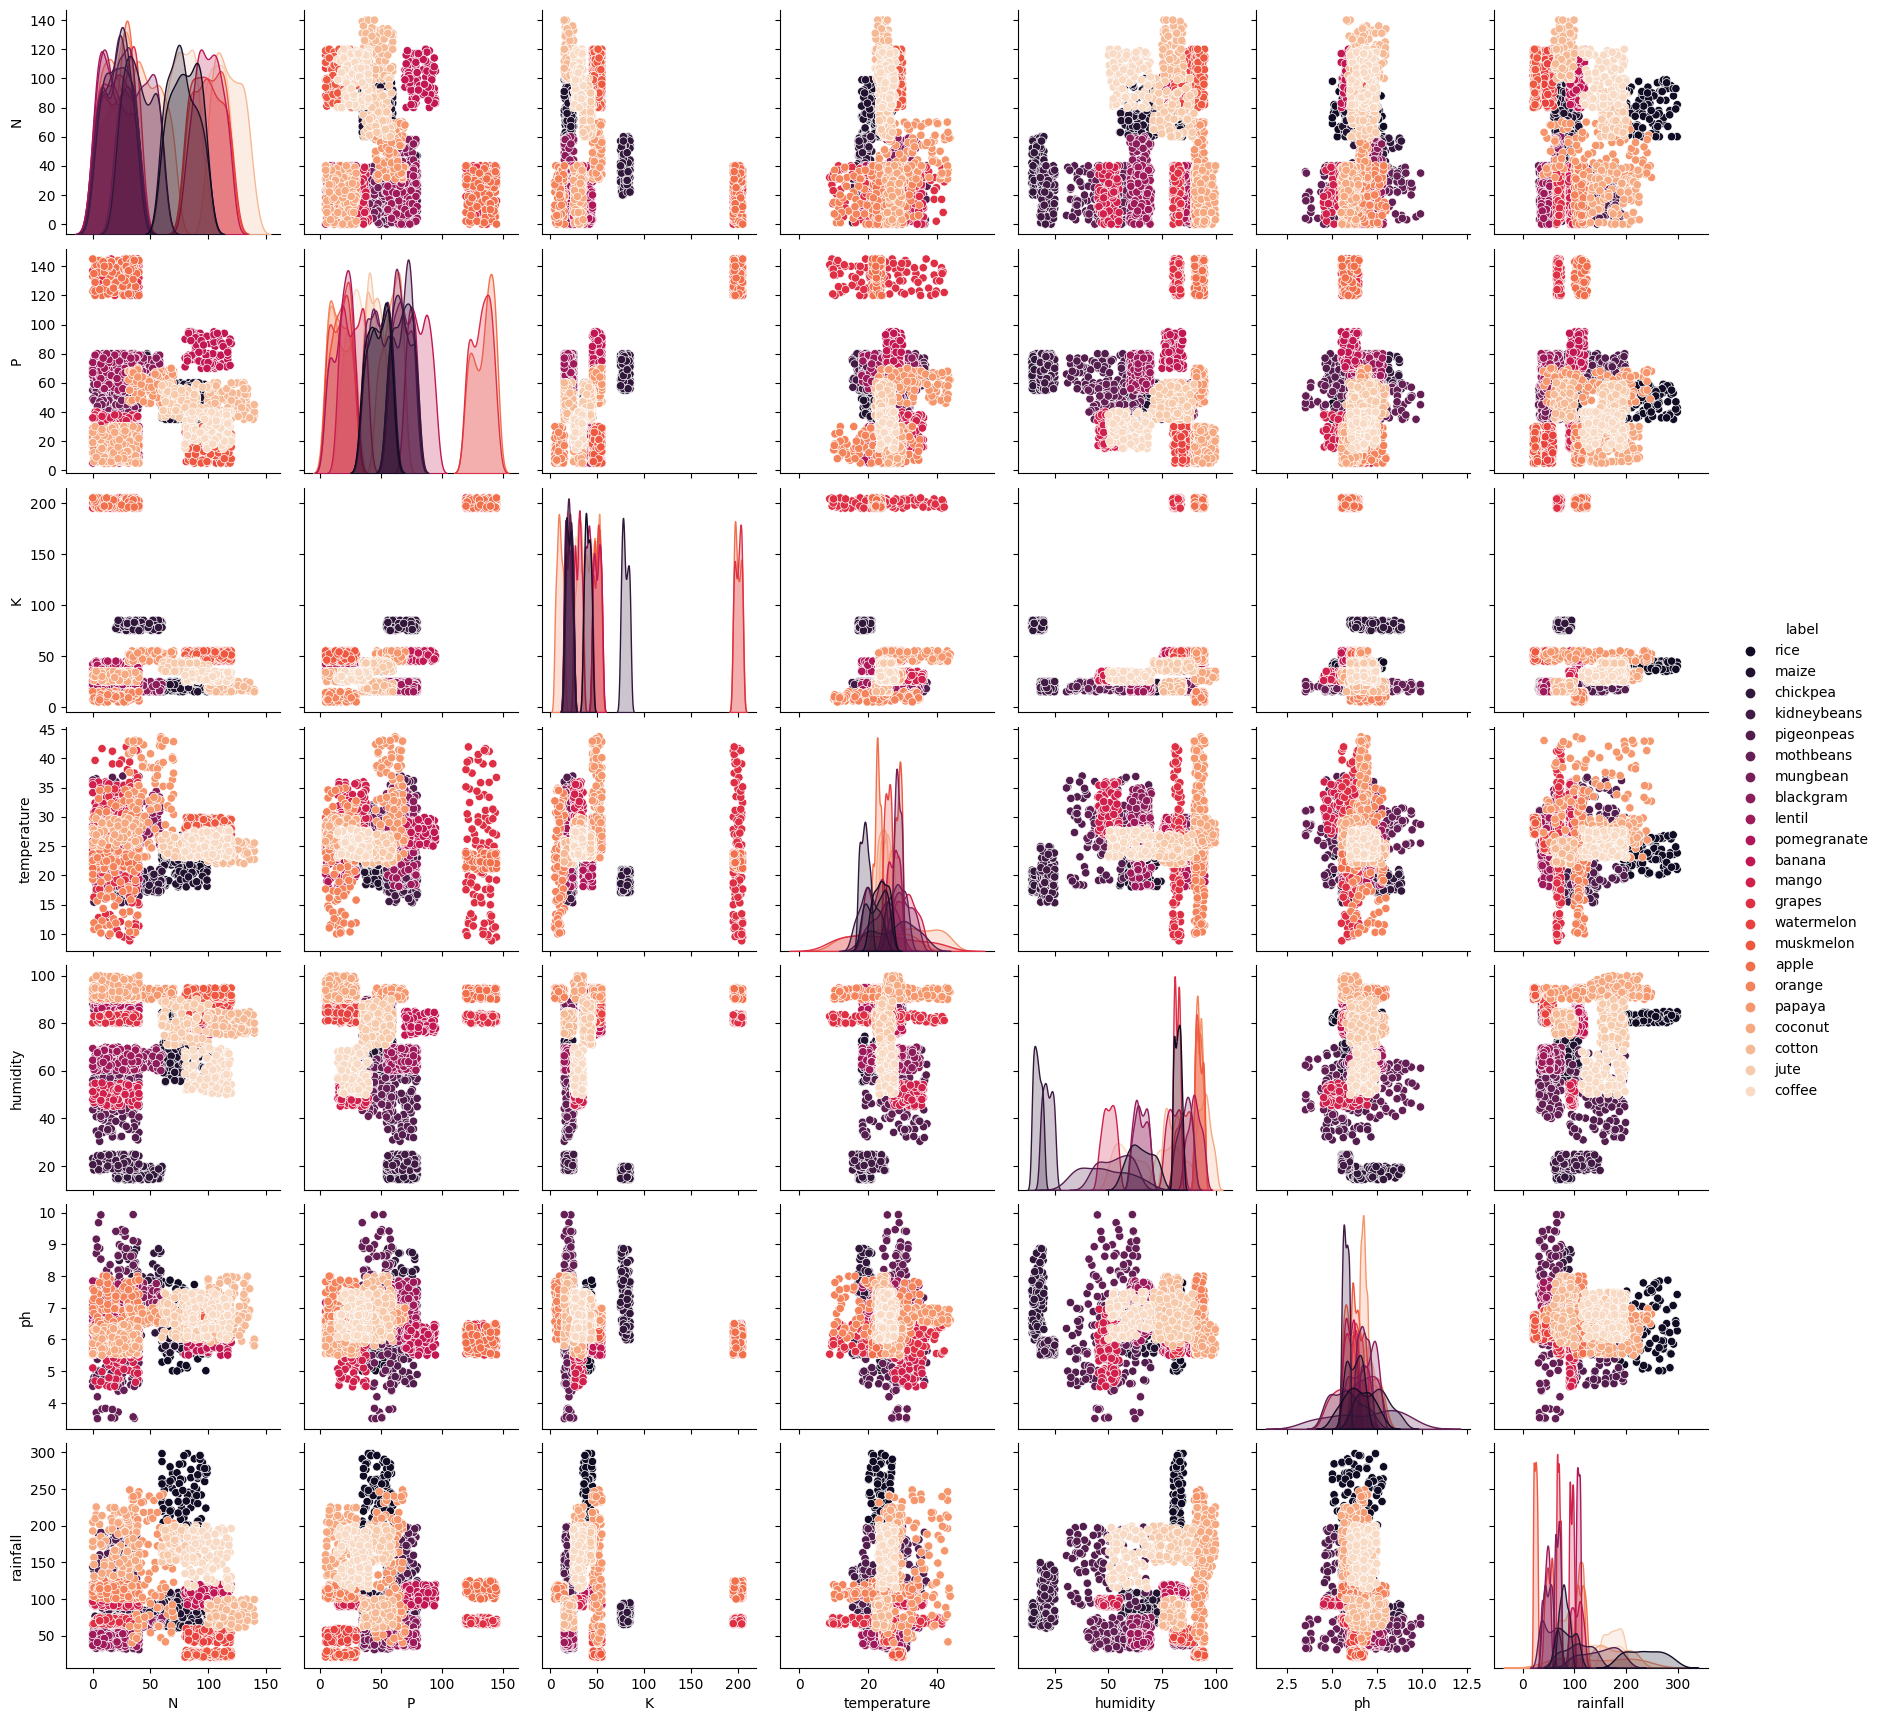

In [174]:
## Plotting pair plot 

sns.pairplot(train_data, hue = 'label', palette = 'rocket')
plt.show()


Here we can see boundaries between two classes, will make easy to seperate 

In [175]:
# scatter plot

make_scatter('temperature','rainfall')

# 4. Model Training

In [176]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

**Method Defination**

In [177]:
def make_prediction(model):
    # Make predictions using the provided model on the test data
    predictions = model.predict(test_X)
    
    # Calculate the accuracy by comparing predicted labels with actual labels
    accuracy = accuracy_score(predictions, test_Y)
    
    # Convert the accuracy to a percentage and round it to two decimal places
    accuracy_percentage = round(accuracy * 100, 2)
    
    return accuracy_percentage


In [178]:

def confusionMatrix(model):
    # Create a K-Fold cross-validation object with 4 splits, shuffling the data for randomness
    fold = KFold(n_splits=4, shuffle=True, random_state=12140860)
    
    # Generate cross-validated predictions using the provided model
    prediction = cross_val_predict(model, features, labels, cv=fold)
    
    # Get unique class labels from the dataset
    class_labels = train_data['label'].unique()
    
    # Generate the confusion matrix based on actual labels and predicted labels
    matrix = confusion_matrix(labels, prediction)
    
    # Create a heatmap visualization of the confusion matrix
    plt.figure(figsize=(12, 12))
    sns.heatmap(matrix, 
                annot=True, 
                fmt='.0f', 
                annot_kws={'fontsize': 9}, 
                xticklabels=class_labels, 
                yticklabels=class_labels)
    plt.tight_layout()
    
    # plotting graph
    plt.xlabel('Prediction')
    plt.ylabel('Actual labels')
    plt.show()

In [179]:
def validation(model):
    # Create a K-Fold cross-validation object with 4 splits, shuffling the data for randomness
    fold = KFold(n_splits=4, shuffle=True, random_state=12140860)
    
    # Perform cross-validation and get an array of scores
    scores = cross_val_score(model, features, labels, cv=fold)
    
    # Calculate the mean of the scores and round it to two decimal places
    mean_score = round(scores.mean()*100, 2)
    
    # Print the individual scores and the average score after cross-validation
    
    print("Individual Scores:- ", scores)
    print("Average score:- ", mean_score)

## 4.1 Logistic Regression

**Model defination and prediction**

In [180]:
# logistic regression

model_logistic = LogisticRegression()
model_logistic.fit(train_X, train_Y)

# Measuring model accuracy
accuracy_logistic = make_prediction(model_logistic)
print(f"Accuracy: {accuracy_logistic}%")

Accuracy: 95.23%


**Cross validation**

In [181]:
# cross validation

validation(model_logistic)

Individual Scores:-  [0.95818182 0.94909091 0.95636364 0.95818182]
Average score:-  95.55


## 4.2 KNN

**Model Defination and Prediction**

In [182]:
# K value hyper-parameter tunning 

Max_accuracy = 0
K_Value = 0

for i in range(1,11):
    
    # KNN Model
    model_KNN = KNeighborsClassifier(n_neighbors=i) 
    model_KNN.fit(train_X,train_Y)

    # Model accuracy
    accuracy_KNN = make_prediction(model_KNN)
    print(f"K value : - {i} ==> Accuracy :- {accuracy_KNN}%")
    
    # checking max accuracy
    if(Max_accuracy<accuracy_KNN):
        Max_accuracy = accuracy_KNN
        K_Value = i

print("\nMaximum accuracy occurs at k=",K_Value," which is ",Max_accuracy)

K value : - 1 ==> Accuracy :- 97.05%
K value : - 2 ==> Accuracy :- 97.27%
K value : - 3 ==> Accuracy :- 97.27%
K value : - 4 ==> Accuracy :- 97.05%
K value : - 5 ==> Accuracy :- 97.27%
K value : - 6 ==> Accuracy :- 97.27%
K value : - 7 ==> Accuracy :- 97.27%
K value : - 8 ==> Accuracy :- 97.05%
K value : - 9 ==> Accuracy :- 96.59%
K value : - 10 ==> Accuracy :- 95.91%

Maximum accuracy occurs at k= 2  which is  97.27


Max accuracy occurs at k=2 for KNN model

**Cross Validation**

In [183]:
# Cross validation

model_KNN = KNeighborsClassifier(n_neighbors=2) 
validation(model_KNN)

Individual Scores:-  [0.96909091 0.97454545 0.96909091 0.97818182]
Average score:-  97.27


## 4.3 Naive Bayes

**Model Defination and Prediction**

In [184]:
# Gaussian Naive Bayes Model

model_Gaussian  = GaussianNB()
model_Gaussian.fit(train_X,train_Y)

# Mesuring Accuracy
accuracy_Gaussian = make_prediction(model_Gaussian)
print(f"Accuracy :- {accuracy_Gaussian}%")

Accuracy :- 99.09%


**Cross Validation**

In [185]:
# Cross Validation

validation(model_Gaussian)

Individual Scores:-  [0.99454545 0.99818182 0.99272727 0.99272727]
Average score:-  99.45


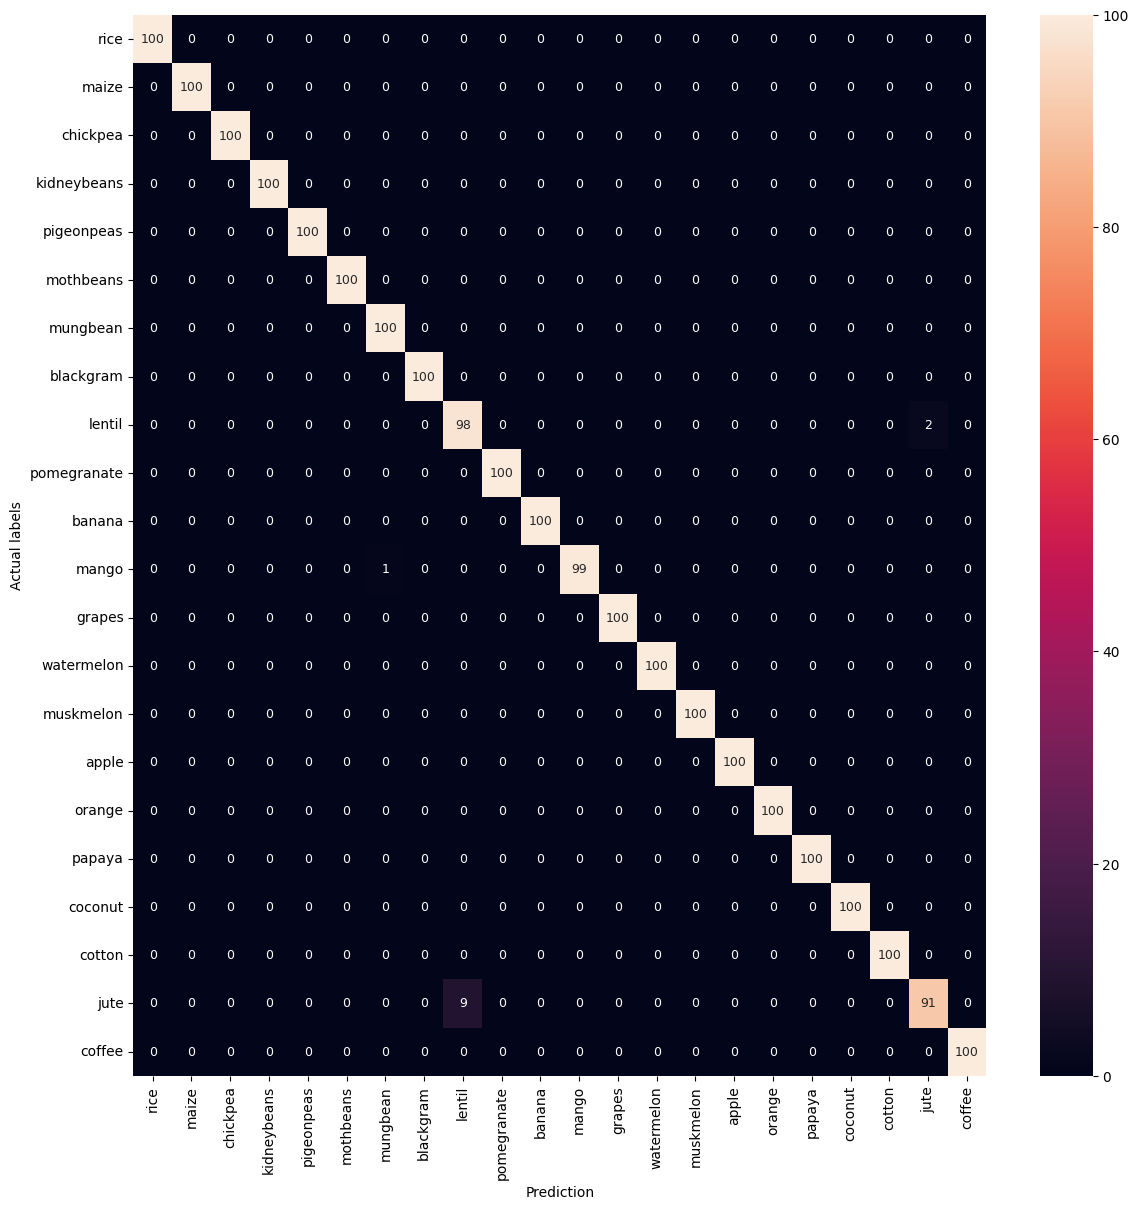

In [186]:
# Confusion matrix for Gaussian Model

confusionMatrix(model_Gaussian)

## 4.4 SVM

**Model Defination and Prediction**

In [187]:
# Model defination 

model_SVM_radical = svm.SVC(kernel='rbf')
model_SVM_radical.fit(train_X,train_Y)

# Measuring accuracy

accuracy_SVM_radical = make_prediction(model_SVM_radical)
print(f"Accuracy :- {accuracy_SVM_radical}%")


Accuracy :- 96.36%


In [188]:
# Model Defination 

model_SVM_linear = svm.SVC(kernel='linear')
model_SVM_linear.fit(train_X,train_Y)

# Measuring Accuracy

accuracy_SVM_linear = make_prediction(model_SVM_linear)
print(f"Accuracy :- {accuracy_SVM_linear}%")


Accuracy :- 98.86%


**Cross Validation**

In [189]:
# cross validatin 

validation(model_SVM_radical)

Individual Scores:-  [0.97636364 0.98363636 0.97454545 0.97272727]
Average score:-  97.68


In [190]:
# cross validatin 

validation(model_SVM_linear)

Individual Scores:-  [0.97818182 0.99090909 0.98909091 0.98363636]
Average score:-  98.55


## 4.5 Decision Tree

**Model Defination and Prediction**

In [191]:
## Model defination
model_DecisionTree = DecisionTreeClassifier(criterion='gini', 
                               max_depth = 10, 
                               random_state = 12140860)
model_DecisionTree.fit(train_X,train_Y)

# Measuring Accuracy
accuracy_DecisionTree = make_prediction(model_DecisionTree)
print(f"Accuracy :- {accuracy_DecisionTree}%")


Accuracy :- 95.91%


**Cross validation**

In [192]:
#cross validation

validation(model_DecisionTree)

Individual Scores:-  [0.97454545 0.98       0.99454545 0.90909091]
Average score:-  96.45


In [193]:
# Decision Tree with Entropy
model_DecisionTree_Entropy = DecisionTreeClassifier(criterion='entropy', 
                               max_depth = 10, 
                               random_state = 12140860)

validation(model_DecisionTree_Entropy)

Individual Scores:-  [0.98545455 0.97090909 0.99272727 0.98727273]
Average score:-  98.41


## 4.6  Random Forest



**Model Defination and Prediction**

In [194]:
#Model Defination

model_RandomForest = RandomForestClassifier(n_estimators=80)
model_RandomForest.fit(train_X,train_Y)

#Model accuracy

accuracy_RandomForest = make_prediction(model_RandomForest)
print(f"Accuracy :- {accuracy_RandomForest}%")

Accuracy :- 98.64%


**Cross Validation**

In [195]:
# Cross Validation

validation(model_RandomForest)

Individual Scores:-  [0.99454545 0.99090909 0.99454545 0.99636364]
Average score:-  99.41


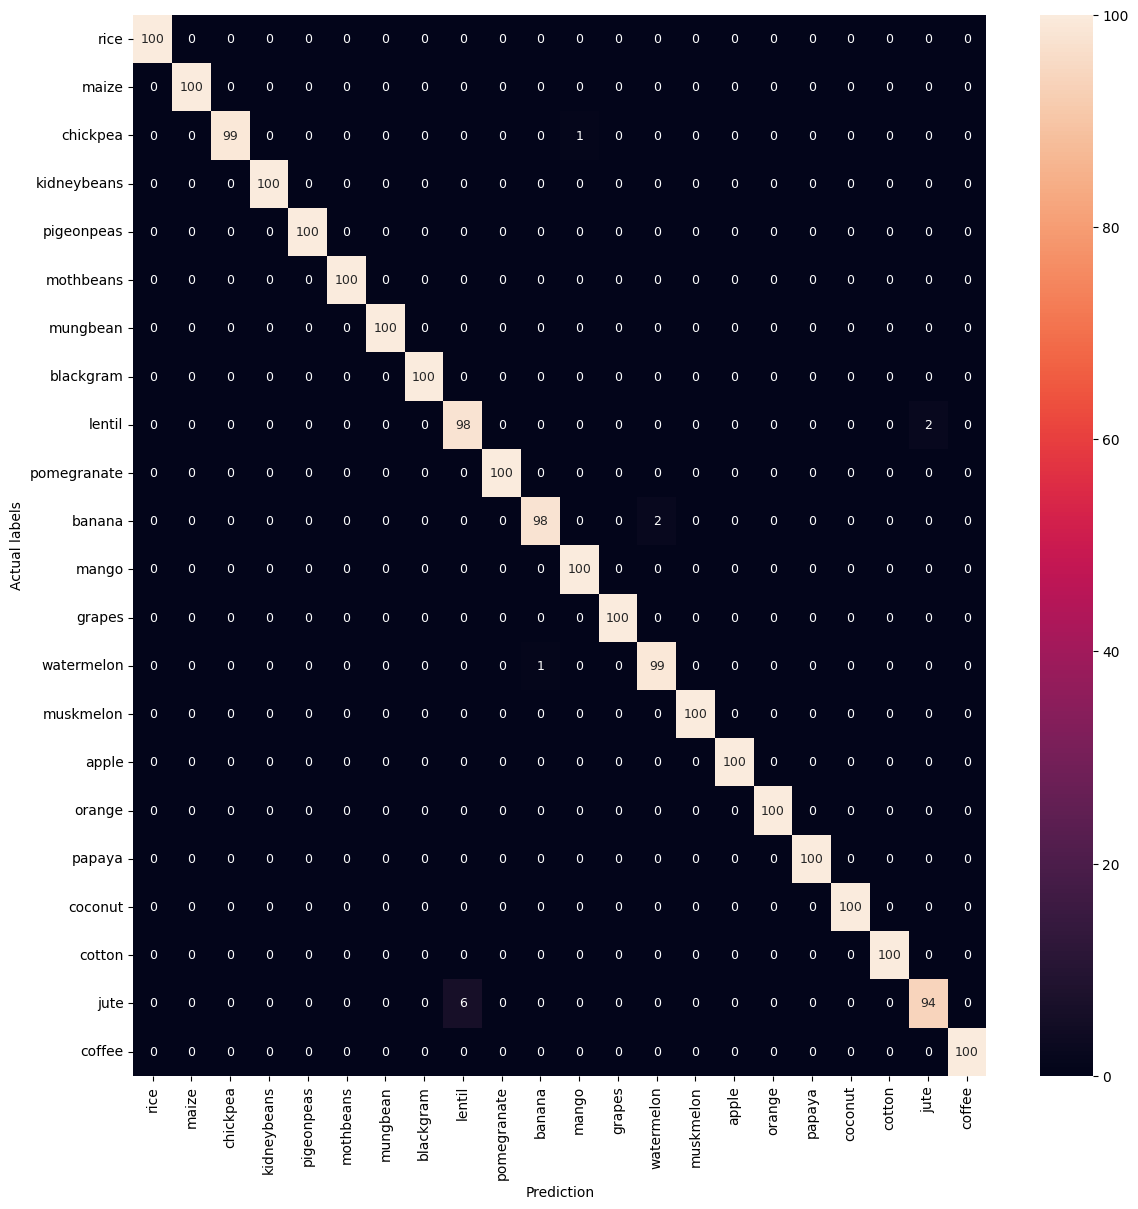

In [196]:
#Confusion matrix

confusionMatrix(model_RandomForest)